##**Description:** 
This Python notebook includes code for voltage clamp experiments in a neuron model. The code uses the NEURON simulation environment and the Matplotlib library to generate plots. The notebook demonstrates how to set up a voltage clamp experiment, record currents, and plot the results for both potassium and sodium currents. The notebook also includes explanations for the code blocks and comments to help understand the code.

###Code Sections:

Importing Libraries and Setting Up NEURON: This section imports the required libraries and sets up the NEURON simulation environment for running voltage clamp experiments.

Setting up the Neuron Model: This section creates a simple neuron model with a soma and inserts the Hodgkin-Huxley conductance for the soma.

Setting up Voltage Clamp and Recording Currents: This section sets up a voltage clamp experiment and records the resulting sodium and potassium currents in the soma.

Plotting Results: This section uses Matplotlib to plot the recorded currents for different voltage clamp values. Two separate subplots are created for the sodium and potassium currents, and a legend is included to label the different voltage values.

In [ ]:
# Import necessary libraries
from neuron import h
from neuron.units import mV, ms, um
import matplotlib.pyplot as plt

# Load hoc file
h.load_file("stdrun.hoc")

In [20]:
# Create soma section with diameter and length of 10 microns
soma = h.Section(name="soma")
soma.L = soma.diam = 10 * um

# Add Hodgkin-Huxley channels to soma
h.hh.insert(soma)

In [21]:
# Create a voltage clamp at the center of the soma section
vclamp = h.SEClamp(soma(0.5))

# Set the voltage clamp parameters
vclamp.amp1 = -65 * mV
vclamp.dur1 = 5 * ms
vclamp.dur2 = 20 * ms
vclamp.amp2 = 20 * mV
vclamp.amp3 = -65 * mV
vclamp.dur3 = 10000 * ms

In [22]:
# Record time and current vectors
t = h.Vector().record(h._ref_t)
ina = h.Vector().record(soma(0.5)._ref_ina)
ik = h.Vector().record(soma(0.5)._ref_ik)

In [ ]:
h.finitialize(-65 * mV)
h.continuerun(30 * ms)

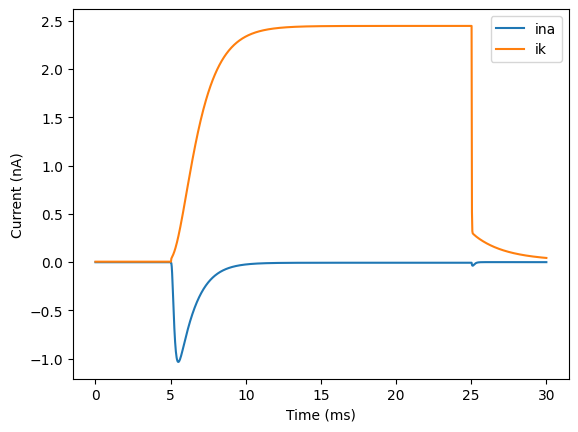

In [24]:
# Plot the recorded sodium and potassium currents over time
plt.plot(t, ina, label="ina")  # Plot sodium current
plt.plot(t, ik, label="ik")    # Plot potassium current

# Set labels for x-axis and y-axis of the plot
plt.xlabel("Time (ms)")
plt.ylabel("Current (nA)")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

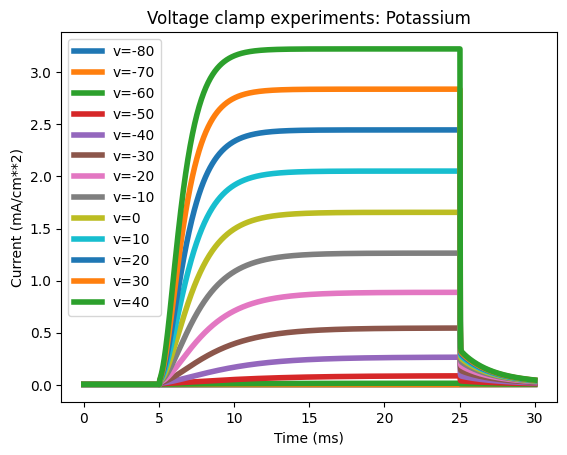

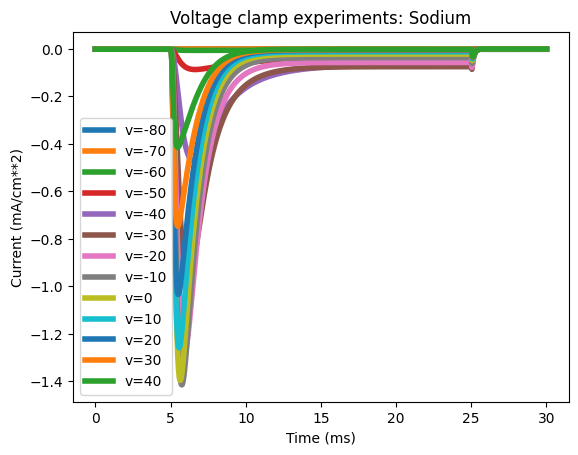

In [25]:
# Define voltage values to be used in the voltage clamp experiments
v_values = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40]

# Create subplots to visualize potassium and sodium currents
k_fig, k_ax = plt.subplots()
na_fig, na_ax = plt.subplots()

# Loop through each voltage value and simulate voltage clamp experiment
for v in v_values:
    vclamp.amp2 = v
    h.finitialize(-65 * mV)
    h.continuerun(30 * ms)
    
    # Plot potassium and sodium currents for each voltage value
    k_ax.plot(t, ik, label=f"v={v}", linewidth=4)
    na_ax.plot(t, ina, label=f"v={v}", linewidth=4)

# Set plot labels and titles
k_ax.set_xlabel("Time (ms)")
k_ax.set_ylabel("Current (mA/cm**2)")
k_ax.set_title("Voltage clamp experiments: Potassium")
k_ax.legend()

na_ax.set_xlabel("Time (ms)")
na_ax.set_ylabel("Current (mA/cm**2)")
na_ax.set_title("Voltage clamp experiments: Sodium")
na_ax.legend()

# Display the plot
plt.show()
